In [2]:
import numpy as np
import matplotlib.ticker as ticker
import polars as pl
from matplotlib import pyplot as plt
import math
from tqdm import tqdm
import glob
import pyarrow as pa
import pyarrow.parquet as pq

plt.style.use("dark_background")

shape: (5, 9)
┌───────┬─────┬─────┬─────┬─────┬───────┬──────┬───────────┬───────────┐
│ frame ┆ id  ┆ x   ┆ y   ┆ ... ┆ angle ┆ type ┆ mass      ┆ vision    │
│ ---   ┆ --- ┆ --- ┆ --- ┆     ┆ ---   ┆ ---  ┆ ---       ┆ ---       │
│ i64   ┆ i64 ┆ i64 ┆ i64 ┆     ┆ i64   ┆ i64  ┆ f64       ┆ f64       │
╞═══════╪═════╪═════╪═════╪═════╪═══════╪══════╪═══════════╪═══════════╡
│ 0     ┆ 0   ┆ 110 ┆ 86  ┆ ... ┆ 44    ┆ 0    ┆ 25.402466 ┆ 25.029592 │
├╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 0     ┆ 1   ┆ 232 ┆ 306 ┆ ... ┆ 37    ┆ 0    ┆ 9.675401  ┆ 34.564611 │
├╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 0     ┆ 2   ┆ 252 ┆ 32  ┆ ... ┆ -156  ┆ 0    ┆ 9.192909  ┆ 52.564361 │
├╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 0     ┆ 3   ┆ 340 ┆ 180 ┆ ... ┆ -105  ┆ 0    ┆ 6.371362  ┆ 56.412919 │
├╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 0     ┆ 4   ┆ 38  ┆ 460 ┆ ... ┆ -76

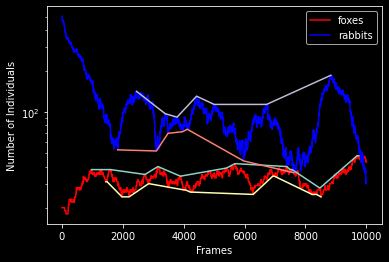

(0.4097596482245643, 0.39558258310585703)


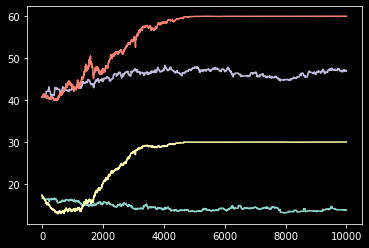

In [20]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
plt.style.use("dark_background")
#df = pl.read_parquet("Experiments/X_978157.pqt")
#pickle.dump(df, open("Experiments/X_978157.pickle", "wb"))
#df = pickle.load(open("Experiments/X_978157.pickle", "rb"))
#df.write_csv("Experiments/X_978157.csv")

def score(q, plot=True, file=None, idx=None):
        query = "fox"
        peak_idxs_fox = find_peaks(q[query], width=100)[0]
        peak_vals_fox = q[query].array[peak_idxs_fox]
        val_idxs_fox = np.setdiff1d(find_peaks(-q[query], width=100)[0], peak_idxs_fox)
        val_vals_fox = q[query].array[val_idxs_fox]

        peak_std_fox = peak_vals_fox.std()/peak_vals_fox.mean()
        val_std_fox = val_vals_fox.std()/val_vals_fox.mean()

        peak_idxs_rab = find_peaks(q["rabbit"], width=100)[0]
        peak_vals_rab = q["rabbit"].array[peak_idxs_rab]
        val_idxs_rab = np.setdiff1d(find_peaks(-q["rabbit"], width=100)[0], peak_idxs_rab)
        val_vals_rab = q["rabbit"].array[val_idxs_rab]

        peak_std_rab = peak_vals_rab.std()/peak_vals_rab.mean()
        val_std_rab = val_vals_rab.std()/val_vals_rab.mean()

        #sin_x = np.arange(len(q["fox"]))
        #sin_vals = np.sin(sin_x/500)*30+60

        #peak_idxs_sin = find_peaks(sin_vals, width=100)[0]
        #peak_vals_sin = sin_vals[peak_idxs_sin]
        #val_idxs_sin = np.setdiff1d(find_peaks(-sin_vals, width=100)[0], peak_idxs_sin)
        #val_vals_sin = sin_vals[val_idxs_sin]

        #peak_std_sin = peak_vals_sin.std()/peak_vals_sin.mean()
        #val_std_sin = val_vals_sin.std()/val_vals_sin.mean()

        score = max(peak_std_rab, val_std_rab) + max(peak_std_fox, val_std_fox)
        score_avg = np.mean([peak_std_rab, val_std_rab]) + np.mean([peak_std_fox, val_std_fox])
        #score_sin = max(peak_std_sin, val_std_sin) + max(peak_std_sin, val_std_sin)
        
        arr = ["X_4179", "X_214370_mediab", "X_479160_mean"]
        if plot:
                plt.plot(q[query].to_list(), color='r')
                plt.plot(q["rabbit"].to_list(), color='b')
                #plt.plot(q["fox_std"].to_list())
                #plt.plot(q["rab_std"].to_list())
                plt.plot(peak_idxs_fox, q[query].array[peak_idxs_fox])
                plt.plot(val_idxs_fox, q[query].array[val_idxs_fox])
                plt.plot(peak_idxs_rab, q["rabbit"].array[peak_idxs_rab])
                plt.plot(val_idxs_rab, q["rabbit"].array[val_idxs_rab])
                #plt.plot(sin_vals)
                plt.legend(["foxes","rabbits"])
                plt.ylabel("Number of Individuals")
                plt.xlabel("Frames")
                plt.yscale("log")
                plt.savefig(start_path+arr[idx]+".png", transparent=True)
                plt.show()

        return score, score_avg
#print(peak_std_fox, val_std_fox, peak_std_rab, val_std_rab)
start_path = "C:/Users/User/Desktop/VU work/Project CI/collective_intelligence_project/Bonus/"
for idx, file in enumerate(["X_421789.csv"]):#"stab/X_528715_max.pqt", "stab/X_479160_mean.pqt", "stab/X_777652_min.pqt"]:
        if file[-1] == 'v':
                df = pl.read_csv(start_path+file)
        elif file[-1] == 't':
                df = pl.read_parquet(start_path+file)
        print(df.head(), len(df))
        if idx == 0:
                query = "type"
        else: query = "fox"
        q = df.groupby("frame").agg(
                        [
                                (pl.col(query) == 1).sum().alias("fox"),
                                (pl.col(query) == 0).sum().alias("rabbit"),
                                (pl.col("mass").filter(pl.col(query) == 1)).mean().alias("mass_fox"),
                                (pl.col("mass").filter(pl.col(query) == 0)).mean().alias("mass_rabbit"),
                                (pl.col("vision").filter(pl.col(query) == 1)).mean().alias("vision_fox"),
                                (pl.col("vision").filter(pl.col(query) == 0)).mean().alias("vision_rabbit")
                        ]).sort("frame")


        q = q.to_pandas()
        print(q[["mass_fox", "mass_rabbit", "vision_fox", "vision_rabbit"]])
        (s, s_a) = score(q, file=file, idx=idx)
        print((s, s_a))

        plt.plot(q[["mass_fox", "mass_rabbit", "vision_fox", "vision_rabbit"]])
        plt.legend(["mass_fox", "mass_rabbit", "vision_fox", "vision_rabbit"])
        plt.show()